# Python for Spatial Analysis
## Second part of the module of GG3209 Spatial Analysis with GIS.
### Notebook to learn and practice Data Visualisation

---
Dr Fernando Benitez -  University of St Andrews - School of Geography and Sustainable Development - First Iteration 2023 v.1.0 

### Introduction 

After practicing **Pandas**, this notebook aims to work with different libraries for graphing and visualizing data using **Python**. Specifically, we will investigate **matplotlib**. We will further explore Seaborn and Pandas, which make use of matplotlib

### Content

* Prepare data for use in a graph.
* Make basic graphs using matplotlib, Seaborn, and Pandas.
* Plot images using matplotlib.
* Understand the differences between and how to use figures and axes or subplots.
* Refine graphs using matplotlib.
* Save graphics to vector or raster graphic files.





## matplotlib


As the name describes, **matplotlib** is based on the graphing functions available in MatLab. 

It allows for the generation of a wide variety of graph types and data visualizations. Further, graphs can be edited, customized, and saved using Python code. 

Here is the link for the [documentation](https://matplotlib.org/stable/index.html) in case you need more information.

This library has been already included in our **py4sa.yml** environment file, so you have already installed it into your MiniConda environment. 

To make graphs, you will work with the **pyplot module** specifically, so it is common to call in that specific module and assign it an alias name. To have the graphs plot in a Jupyter Notebook, you will need to include "%maplotlib inline" in your code. You can also change default parameters. 

## Datasets

In order to provide examples of a wide variety of graph types, We will use the datasets avaliable in the data folder, if you need details about the source of the data, take a look at the metadata.md integrated in that folder.



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # alias is plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 8] #Change the default plot size.

In [38]:
# The Scottish Index of Multiple Deprivation (SIMD) 2020 
simd = pd.read_csv("data/SG_SIMD_2020.csv", header=0)
simd.columns =[column.replace(" ", "_") for column in simd.columns]  # Removing any spaces in the column names using list comprehension.
simd.tail(5)

,OID_,DataZone,DZName,LAName,SAPE2017,WAPE2017,Rankv2,Quintilev2,Decilev2,Vigintilv2,...,GAccBrdbnd,GAccRank,CrimeCount,CrimeRate,CrimeRank,HouseNumOC,HouseNumNC,HouseOCrat,HouseNCrat,HouseRank
6971,6971,S01013477,Broxburn South - 06,West Lothian,612,355,2464,2,4,8,...,0%,5672,13,217,3161.0,93,10,15%,2%,1671.0
6972,6972,S01013478,Broxburn East - 01,West Lothian,817,582,3681,3,6,11,...,0%,5402,29,350,1819.0,87,1,10%,0%,3594.0
6973,6973,S01013479,Broxburn East - 02,West Lothian,785,479,1423,2,3,5,...,1%,5424,44,560,795.0,96,9,12%,1%,2624.0
6974,6974,S01013480,Broxburn East - 03,West Lothian,677,410,3291,3,5,10,...,0%,3524,7,106,5007.0,107,1,16%,0%,1865.0
6975,6975,S01013481,Broxburn East - 04,West Lothian,462,305,5269,4,8,16,...,8%,2384,13,287,2364.0,67,2,15%,0%,2082.0


In [14]:
# House sales prices in Scotland 
houses_prices = pd.read_csv("data/house-sales-prices.csv", header=0)
houses_prices.columns =[column.replace(" ", "_") for column in houses_prices.columns] # Removing any spaces in the column names using list comprehension.
houses_prices.head(10)

,RefArea,Reference_Area,1993,1994,1995,1996,1997,1998,1999,2000,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,S92000003,Scotland,55200,57798,58990,60277,63775,66127,70595,74224,...,159075,163396,163264,158491,162266,175043,176787,173982,180663,181457
1,S12000033,Aberdeen City,62601,66747,65194,67367,69634,72194,75770,78665,...,178330,188299,192384,192910,205666,221236,232228,215119,210428,199125
2,S12000034,Aberdeenshire,63952,67675,67932,68846,70669,74293,78485,79947,...,198155,206129,210272,207905,218734,230901,235254,218032,216351,214414
3,S12000041,Angus,50774,52543,53604,55039,57474,57694,60502,64933,...,146889,149402,147126,147635,147753,156662,166519,162570,160776,163377
4,S12000035,Argyll and Bute,58199,61329,60683,63402,65042,74949,68691,74841,...,152428,157444,157246,149470,154078,149467,154750,157152,157430,162956
5,S12000036,City of Edinburgh,62487,67359,70390,71968,77292,84337,93389,101199,...,210365,221948,221303,219176,219771,264956,251324,247623,262868,280643
6,S12000005,Clackmannanshire,53365,52904,54182,52301,59573,58952,60319,62541,...,137181,134226,128829,130346,128155,136170,132782,138259,141435,145137
7,S12000006,Dumfries and Galloway,52017,55008,53687,54991,58666,58114,62567,64122,...,139254,143694,136414,139363,134277,141565,137917,142011,141662,147336
8,S12000042,Dundee City,44453,46626,48278,48844,50052,52683,55562,57466,...,131438,127998,125579,125026,129378,138355,134534,140199,144436,140356
9,S12000008,East Ayrshire,45149,47164,48138,49152,49807,50379,55463,56102,...,121101,120399,121842,112561,111852,110748,118071,119890,124603,120856


In [7]:
# Runoff data per month
runoff = pd.read_csv("data/runoff_data_by_month.csv", header=0)
runoff.columns =[column.replace(" ", "_") for column in runoff.columns] # Removing any spaces in the column names using list comprehension.
runoff.head(10)

,month,Year,runoff
0,Jan,1991,135.082
1,Feb,1991,99.018
2,Mar,1991,152.954
3,Apr,1991,126.352
4,May,1991,16.436
5,Jun,1991,2.752
6,Jul,1991,0.909
7,Aug,1991,0.399
8,Sep,1991,0.655
9,Oct,1991,0.976


In [4]:
# Latest Earthquakes in Feb 2023
earthquakes = pd.read_csv("data/Latest_earthquake_world.csv", header=0)
earthquakes.columns =[column.replace(" ", "_") for column in earthquakes.columns] # Removing any spaces in the column names using list comprehension.
earthquakes.head(5)

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2023-02-23T08:01:02.881Z,38.1280,73.2184,10.000,4.70,mb,75.0,55.0,1.7450,0.66,...,2023-02-23T08:35:43.040Z,"65 km W of Murghob, Tajikistan",earthquake,4.00,1.907,0.058,91.0,reviewed,us,us
1,2023-02-23T06:55:34.020Z,18.7946,-63.9205,10.000,3.67,md,19.0,228.0,1.1264,0.50,...,2023-02-23T08:02:57.172Z,Leeward Islands,earthquake,5.27,4.420,0.130,14.0,reviewed,pr,pr
2,2023-02-23T06:50:49.137Z,38.4879,72.8122,10.000,4.50,mb,21.0,171.0,1.2640,0.56,...,2023-02-23T07:28:35.040Z,"106 km WNW of Murghob, Tajikistan",earthquake,8.00,2.000,0.140,15.0,reviewed,us,us
3,2023-02-23T06:18:13.280Z,-8.5483,-77.6254,66.540,4.70,mb,44.0,154.0,3.5030,0.47,...,2023-02-23T07:15:40.040Z,"22 km SW of Quiches, Peru",earthquake,8.10,8.700,0.064,74.0,reviewed,us,us
4,2023-02-23T03:36:09.429Z,-18.2870,-177.8261,524.983,4.90,mb,40.0,63.0,3.6260,0.67,...,2023-02-23T03:50:54.040Z,NaN,earthquake,13.43,10.963,0.108,27.0,reviewed,us,us


## Basic Graphs


Before you can create complex and well-refined graphs, we need to know the basics. Here we can see how to generate simple graphs using the basic matplotlib syntax.

In the first example below I have produced a basic scatter plot to visualize the relationship between mean elevation and mean annual temperature at the county-level in the high plains states as an example of a bivariate graph. The first argument, elevation, is plotted to the x-axis and the second argument, temperature, is plotted to the y-axis. Here, I used dot notation; however, bracket notation is also acceptable. The graph is saved to a variable then the show() method from the pyplot module is used to plot the graph. It isn't necessary to provide the graph name as an argument as the last created graph will be plotted by default.

Although this graph is adequate to simply visualize the data and the relationship between the two variables, it is still a bit rough to include in a presentation or report. We will cover refining the output later in this module.

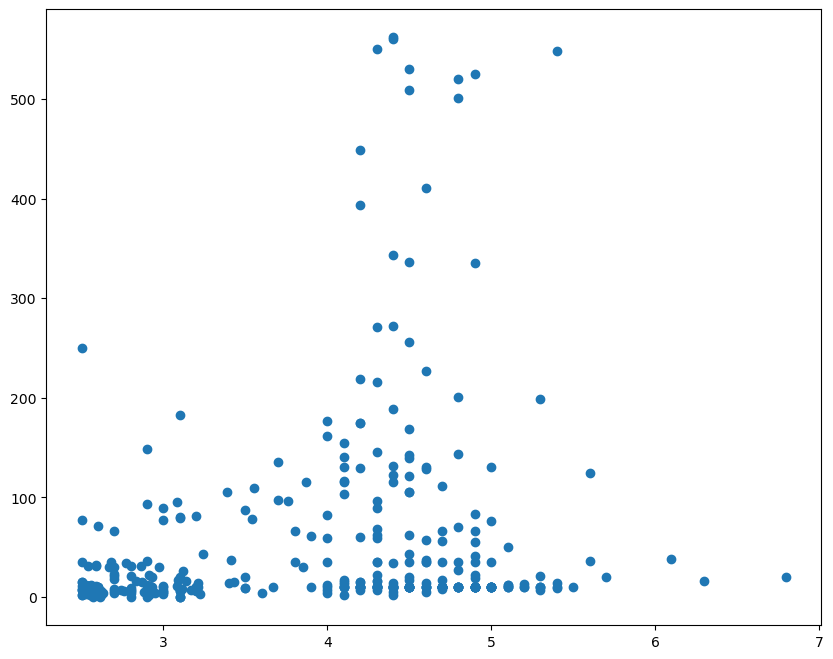

In [12]:
sp1 = plt.scatter(earthquakes.mag, earthquakes.depth)
#plt.scatter(hp["elev"], hp["temp"])
plt.show(sp1)

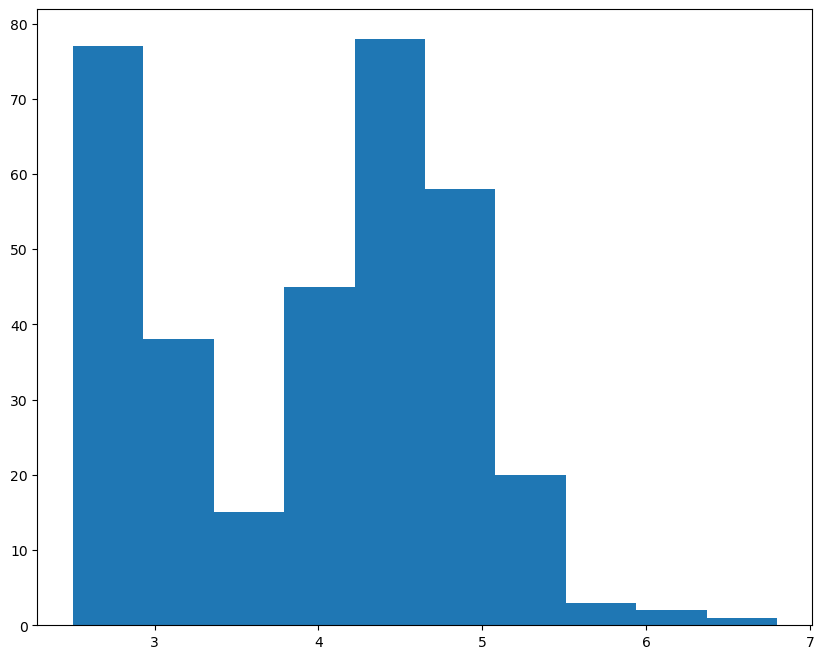

In [20]:
hist1 = plt.hist(earthquakes['mag'])
plt.show(hist1)

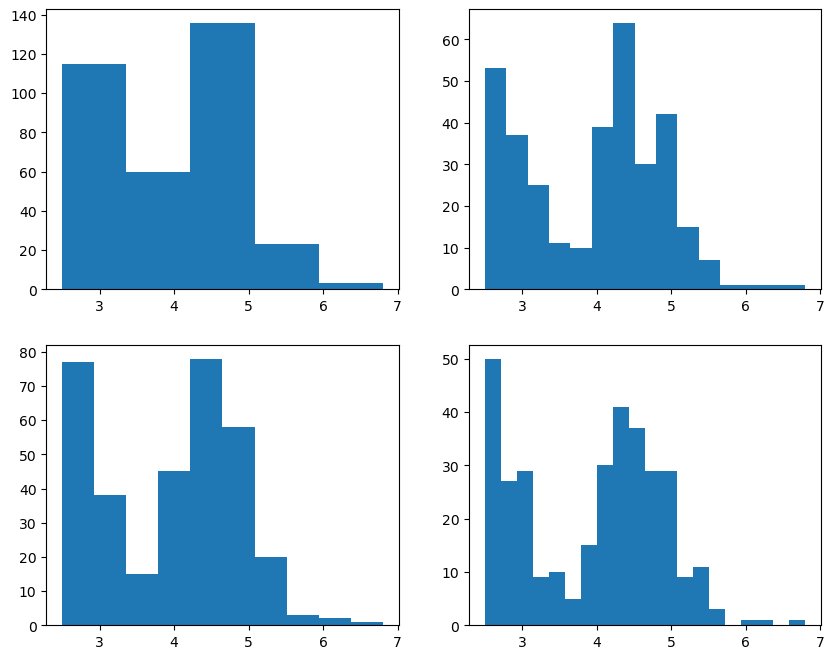

In [21]:
fig1, axs = plt.subplots(2,2)
axs[0,0].hist(earthquakes.mag, bins=5)
axs[1,0].hist(earthquakes.mag, bins=10)
axs[0, 1].hist(earthquakes.mag, bins=15)
axs[1, 1].hist(earthquakes.mag, bins=20)
plt.show(fig1)

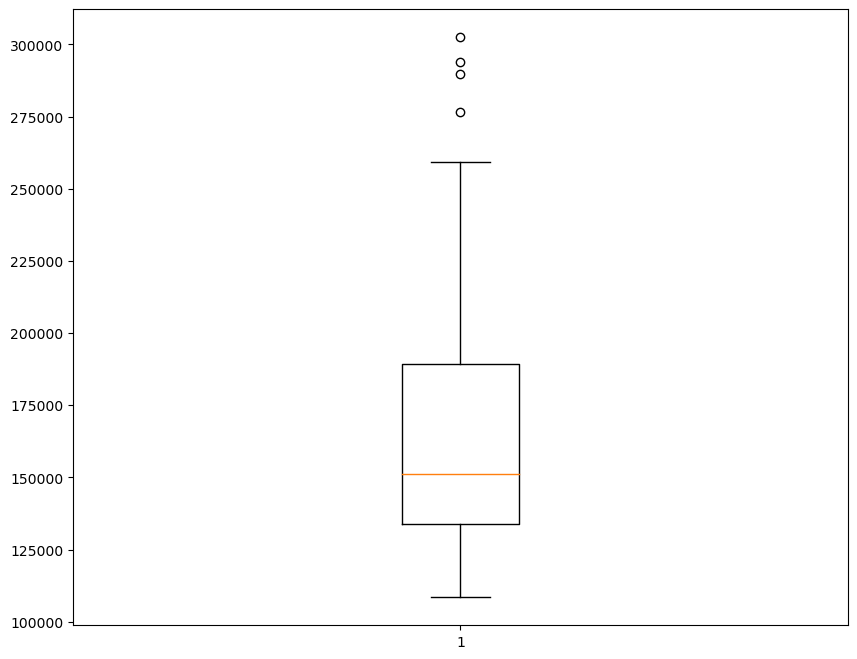

In [24]:
bp1 = plt.boxplot(x=houses_prices['2015'])
plt.show(bp1)

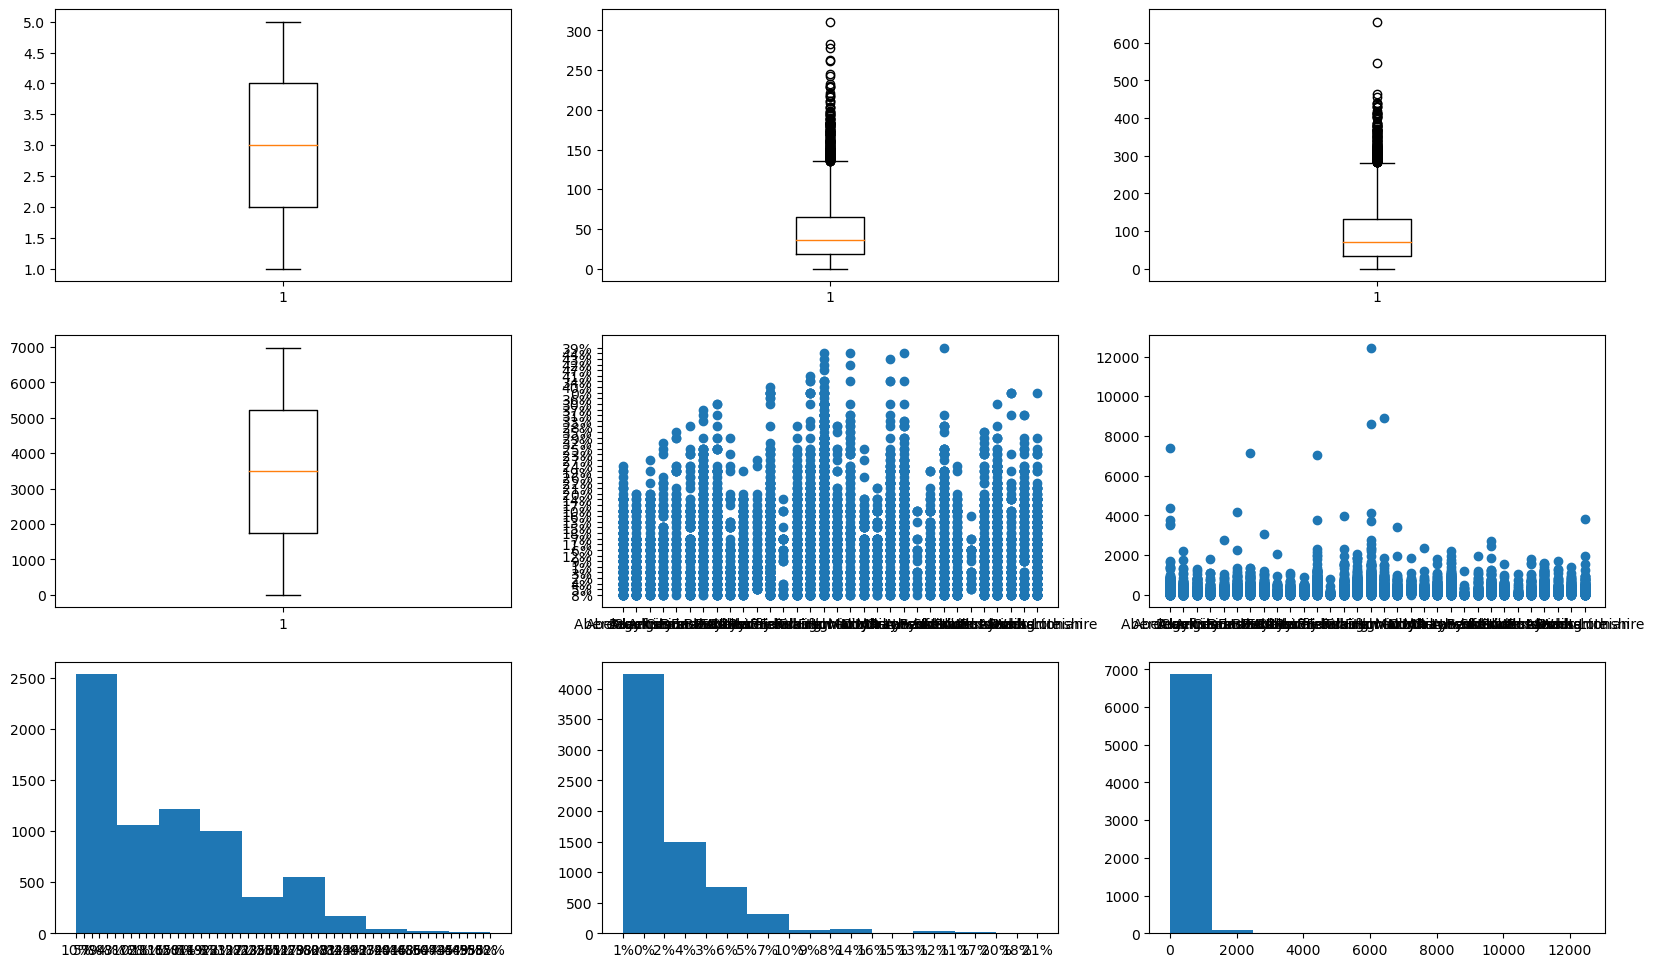

In [40]:
plt.rcParams['figure.figsize'] = [20, 12] #Change the default plot size.
fig1, axs = plt.subplots(3,3)
axs[0,0].boxplot(simd.Quintilev2)
axs[0,1].boxplot(simd.EmpNumDep)
axs[0,2].boxplot(simd.IncNumDep)
axs[1,0].boxplot(simd.EduRank)
axs[1,1].scatter(simd.LAName, simd.EmpRate)
axs[1,2].scatter(simd.LAName, simd.CrimeRate)
axs[2,0].hist(simd.HouseOCrat)
axs[2,1].hist(simd.HouseNCrat)
axs[2,2].hist(simd.CrimeRate)
plt.show(fig1)

## Seaborn

Seaborn is a Python library based on **matplotlib** and simplifies the generation of a variety of graph types and data visualizations.

It is also an easier way to interact with matplotlib. Here is a link to the Seaborn [documentation](https://seaborn.pydata.org/). This library has been already integrated in our python environment, so you just need to import it.

In [2]:
import seaborn as sns

Now run the following cell, but also take some time to update the attributes/parameters and create different plots, For example in the following example, we are plotting Depth Vs Magnitude. 

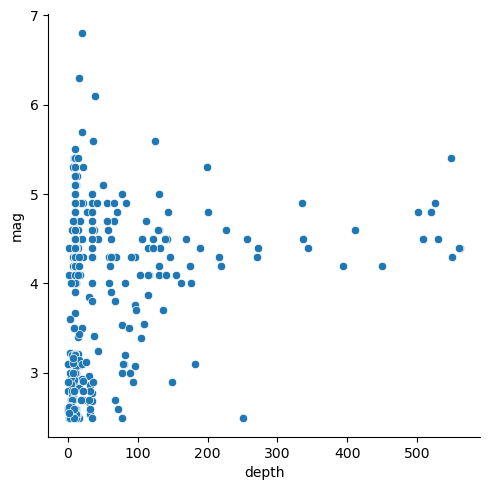

In [5]:
sns.relplot(x="depth", y="mag", data=earthquakes)


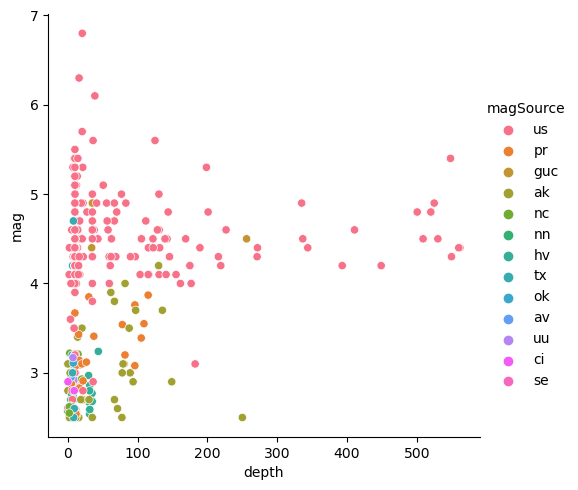

In [8]:
sns.relplot(x="depth", y="mag", hue="magSource", data=earthquakes)


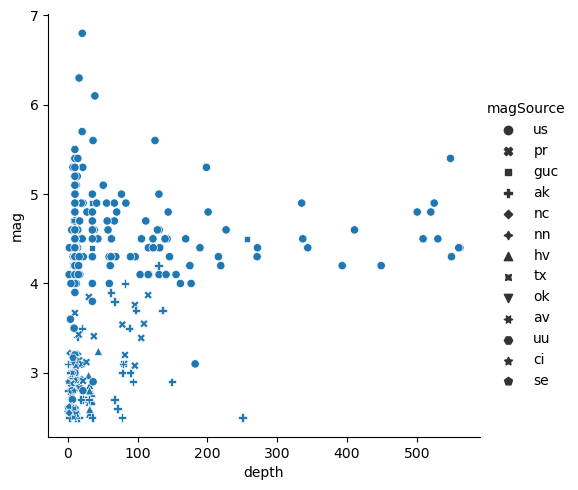

In [9]:
sns.relplot(x="depth", y="mag", style="magSource", data=earthquakes)
